In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential


In [4]:
# Paths to your dataset directories
train_data_dir = '/Users/hardikchhipa/Desktop/DR-Arvind/Binary Classification on Retina/dataset/'

# ImageDataGenerator for rescaling and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% of the data for validation
)

# Training set
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'  # 80% of the data used for training
)

# Validation set
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # 20% of the data used for validation
)


Found 6069 images belonging to 2 classes.
Found 1516 images belonging to 2 classes.


In [5]:
# Building a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Retina or Non-Retina)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs= 25  # Adjust based on your dataset size and performance
)

# Save the model
model.save('retina_non_retina_classifier.h5')

Epoch 1/25


2024-09-14 04:31:59.300700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 04:32:00.577572: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.9460 - loss: 0.1461 - val_accuracy: 0.9907 - val_loss: 0.0345
Epoch 2/25
  1/189 ━━━━━━━━━━━━━━━━━━━━ 2:58 950ms/step - accuracy: 0.9688 - loss: 0.2209

2024-09-14 04:40:29.305130: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.2209 - val_accuracy: 0.9167 - val_loss: 0.0969
Epoch 3/25


2024-09-14 04:40:29.552779: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-14 04:40:39.748599: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-09-14 04:40:43.074834: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.9927 - loss: 0.0284 - val_accuracy: 0.9947 - val_loss: 0.0172
Epoch 4/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 2.0950e-05
Epoch 5/25


2024-09-14 04:48:22.528415: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-14 04:48:34.440316: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-09-14 04:48:37.587880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 489s 3s/step - accuracy: 0.9881 - loss: 0.0428 - val_accuracy: 0.9980 - val_loss: 0.0107
Epoch 6/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 1.0000 - loss: 1.4856e-04 - val_accuracy: 1.0000 - val_loss: 1.9017e-04
Epoch 7/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.9972 - loss: 0.0131 - val_accuracy: 0.9840 - val_loss: 0.0757
Epoch 8/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.9688 - loss: 0.2186 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 9/25


2024-09-14 05:04:29.434692: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-14 05:04:41.234048: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 05:04:42.884610: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9960 - val_loss: 0.0114
Epoch 10/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0951 - val_accuracy: 1.0000 - val_loss: 7.2245e-05
Epoch 11/25


2024-09-14 05:12:32.072808: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 05:12:33.688053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.9965 - loss: 0.0121 - val_accuracy: 0.9973 - val_loss: 0.0079
Epoch 12/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9167 - val_loss: 0.2502
Epoch 13/25


2024-09-14 05:20:20.711705: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 05:20:21.999152: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9987 - val_loss: 0.0074
Epoch 14/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 0.0171
Epoch 15/25


2024-09-14 05:28:10.564274: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 05:28:12.247047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9987 - val_loss: 0.0123
Epoch 16/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 1.0000 - loss: 3.3007e-06 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 17/25


2024-09-14 05:35:50.701608: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-14 05:36:01.272564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-09-14 05:36:04.486089: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.9978 - loss: 0.0057 - val_accuracy: 0.9874 - val_loss: 0.0515
Epoch 18/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.9062 - loss: 0.2172 - val_accuracy: 1.0000 - val_loss: 3.6161e-05
Epoch 19/25


2024-09-14 05:43:49.685163: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 05:43:50.999585: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step - accuracy: 0.9958 - loss: 0.0172 - val_accuracy: 0.9980 - val_loss: 0.0097
Epoch 20/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 2.1810e-07
Epoch 21/25


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
2024-09-14 05:51:59.390073: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 05:52:00.400026: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9834 - val_loss: 0.0544
Epoch 22/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 23/25


2024-09-14 06:00:06.445856: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-09-14 06:00:09.391288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - accuracy: 0.9942 - loss: 0.0234 - val_accuracy: 0.9987 - val_loss: 0.0083
Epoch 24/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 1.4700e-05
Epoch 25/25


2024-09-14 06:08:06.553963: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-09-14 06:08:09.499030: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 0.9947 - val_loss: 0.0280


In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('retina_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/p2/6mgfcw956d17xkqh172sdjk40000gn/T/tmpt3a5lc_h/assets


INFO:tensorflow:Assets written to: /var/folders/p2/6mgfcw956d17xkqh172sdjk40000gn/T/tmpt3a5lc_h/assets


Saved artifact at '/var/folders/p2/6mgfcw956d17xkqh172sdjk40000gn/T/tmpt3a5lc_h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  13396820048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396821392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396821008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396822160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396820240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396822928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396821200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396823696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396823888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13396825040: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1726289999.708029  630402 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1726289999.709010  630402 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-09-14 10:29:59.711527: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/p2/6mgfcw956d17xkqh172sdjk40000gn/T/tmpt3a5lc_h
2024-09-14 10:29:59.712350: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-09-14 10:29:59.712357: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/p2/6mgfcw956d17xkqh172sdjk40000gn/T/tmpt3a5lc_h
2024-09-14 10:29:59.722254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-09-14 10:29:59.724447: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-09-14 10:29:59.870133: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at 

In [7]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

48/48 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9966 - loss: 0.0243
Validation Accuracy: 99.47%


48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step
[[424 360]
 [347 385]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       784
           1       0.52      0.53      0.52       732

    accuracy                           0.53      1516
   macro avg       0.53      0.53      0.53      1516
weighted avg       0.53      0.53      0.53      1516



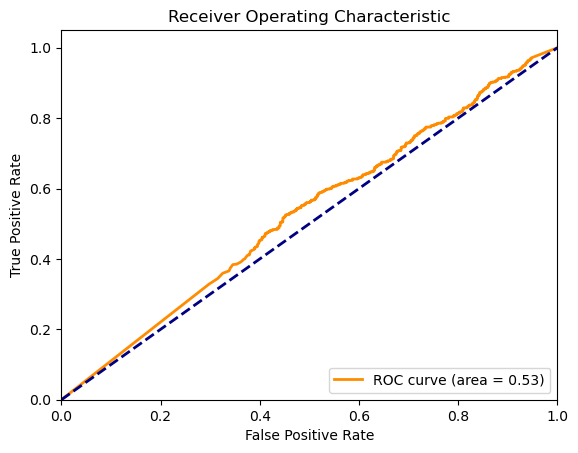

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Get the true labels and predictions
Y_pred = model.predict(validation_generator)
y_pred = np.round(Y_pred).astype(int).flatten()
y_true = validation_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Calling the Saved Models

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


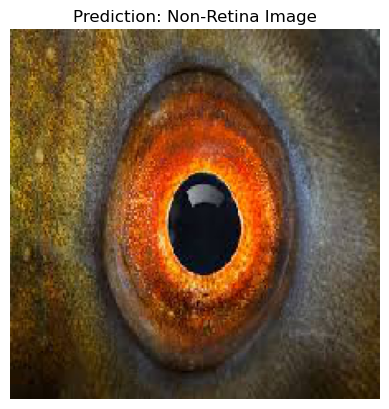

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('retina_non_retina_classifier.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

# Function to make predictions
def predict_image(img_array):
    prediction = model.predict(img_array)
    return np.round(prediction[0][0])

# Function to display the image with the prediction
def display_image_and_prediction(img_path):
    # Load and preprocess image
    img, img_array = load_and_preprocess_image(img_path)
    
    # Make a prediction
    prediction = predict_image(img_array)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    label = "Retina Image" if prediction == 1 else "Non-Retina Image"
    plt.title(f"Prediction: {label}")
    
    # Show the image and prediction result
    plt.show()

# Path to the image you want to test
img_path = '/Users/hardikchhipa/Downloads/download.jpeg'

# Call the function to display the image and prediction
display_image_and_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


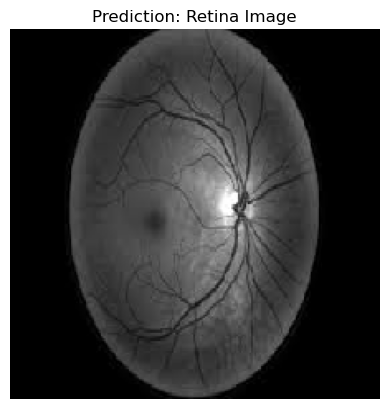

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('retina_non_retina_classifier.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

# Function to make predictions
def predict_image(img_array):
    prediction = model.predict(img_array)
    return np.round(prediction[0][0])

# Function to display the image with the prediction
def display_image_and_prediction(img_path):
    # Load and preprocess image
    img, img_array = load_and_preprocess_image(img_path)
    
    # Make a prediction
    prediction = predict_image(img_array)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    label = "Retina Image" if prediction == 1 else "Non-Retina Image"
    plt.title(f"Prediction: {label}")
    
    # Show the image and prediction result
    plt.show()

# Path to the image you want to test
img_path = '/Users/hardikchhipa/Downloads/images.jpeg'

# Call the function to display the image and prediction
display_image_and_prediction(img_path)